<a href="https://colab.research.google.com/github/adelic-matf/MKE/blob/main/Firedrake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Firedrake na google colabu

Firedrake je Python biblioteka za numeričko rešavanje parcijalnih diferencijalnih jednačina metodom konačnih elemenata.
Razvijena je kao naslednik FEniCS-a, a nudi modernije kompilatore, bolju podršku za paralelizaciju, lakše eksperimentisanje i brže ispravljanje bagova.

##Instalacija Firedrake-a

Colab mašina nema unapred instaliran Firedrake – ona kreće sa „čistim“ Python okruženjem. Instalaciju Firedrake-a moramo raditi pri svakom novom pokretanju Colab-a, jer Colab svaki put pokreće novu privremenu mašinu, pa se instalacije ne čuvaju za sledeći put.



Firedrake instaliramo pomoću sledeće komande (proces traje neko kraće vreme):

In [1]:
try:
    import firedrake  # uvezi biblioteku Firedrake ako je već instalirana
except ImportError: # u suprotnom instaliraj i uvezi
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

--2025-09-18 16:52:46--  https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4767 (4.7K) [application/x-sh]
Saving to: ‘/tmp/firedrake-install.sh’

/tmp/firedrake-inst 100%[===================>]   4.66K  --.-KB/s    in 0s      

2025-09-18 16:52:46 (40.7 MB/s) - ‘/tmp/firedrake-install.sh’ saved [4767/4767]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FIREDRAKE_INSTALLED=/usr/local/share/fem-on-colab/firedrake.installed
+ [[ ! -f /usr/local/share/fem-on-colab/firedrake.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/dbcf

# Prvi primer - Poasonova jednačina na kvadratu sa homogenim Dirihleovim graničnim uslovima


Neka je $\Omega$ jedinični kvadrat $\Omega=(0,1)\times (0,1)$. Rešavamo Poasonovu jednačinu
$$
-\Delta u=f, \quad (x,y)\in \Omega, \qquad (1)
$$
sa homogenim Dirihleovim graničnim uslovima
$$
u=0, \quad (x,y)\in \Gamma. \qquad (2)
$$

Izaberimo za prostor test funkcija $H_0^1(\Omega)$. Pomnožimo jednačinu test funkcijom $v\in H_0^1(\Omega)$ i integralimo po oblasti $\Omega$. Primenom parcijalne integracije i korišćenjem graničnih uslova (2), dobijamo varijacionu formulaciju problema koja glasi:

odrediti funkciju $u\in H_0^1(\Omega)$ za koju je
$$
a(u,v)=l(v), \quad \text{za sve test funkcije} \quad v\in H_0^1(\Omega), \qquad(3)
$$
gde je
$$
a(u,v)=\int_{\Omega}\nabla u \cdot \nabla v\,dx
$$
bilinearna forma i
$$
l(v)=\int_{\Omega}f v\,dx
$$
linearni funkcional.

# Aproksimacija deo po deo linearnim Lagranžovim elementima

U metodi konačnih elemenata aproksimaciju problema $(3)$ tražimo na nekom konačno dimenzionom podprostoru $V_h$ prostora $ H_0^1(\Omega)$. Prostor $V_h$ konstruišemo tako što prvo izvršimo podelu domena $\Omega$ na poddomene koje nazivamo ćelijama. U zavisnosti od toga koje konačne elemente koristimo ćelije će biti trouglovi, kvadrati, pravougaonici, poligoni, isoparametarski elementi (poligoni sa zakrivljenom granicom), itd.

U ovom primeru izabraćemo deo po deo linearne Lagranžove konačne elemente, a to znači da će ćelije biti trouglovi. Pretpostavimo da je domen $\Omega$ poligonijalna oblast. Tada ga možemo pokriti konačnim brojem trouglova. Bazne funkcije se definišu pomoću temena tih trouglova tako da je svaka bazna funkcija jednaka jedinici samo u jednom temenu, a u svim ostalim temenima je jednaka nuli.

Dakle, ako su $z_1, z_2, \dots z_{N}$ temena mreže koja pripadaju unutrašnjosti oblasti $\Omega$, svakom temenu pridružujemo baznu funkciju $\varphi_i$ takvu da je ispunjeno
$$
\varphi_i(z_j)=\delta_{ij}, \quad i,j=1,2,\dots, N,
$$
gde je $\delta_{ij}$ Kronekerov delta simbol. Primetimo da su ove funkcije linearno nezavisne.

Sada možemo definisati prostor $V_h$ u kome tražimo aproksimaciju rešenja problema (3). To će biti linearni omotač
$$
V_h=span \text{{$\varphi_1$, $\varphi_2$, $\dots$ ,$\varphi_N$}  }.
$$

Aproksimaciju $u_h$ rešenja $u$ problema $(3)$ tražimo u obliku
$$
u_h=\sum_{i=1}^N U_i \varphi_i,
$$
gde su $U_i, \, i=1,2,\dots, N$ nepoznate vrednosti koje trebamo odrediti.

Kada rešavamo Poasonovu jednačinu sa homogenim Dirihleovim graničnim uslovima, za prostor test funkcija biramo isti prostor $V_h$. Sada smo spremni da definišemo problem aproksimacije metodom konačnih elemenata:

odrediti funkciju $u_h\in V_h$ za koju je
$$
a(u_h,v_h)=l(v_h), \quad \text{za sve test funkcije} \quad v_h\in V_h, \qquad(4)
$$
gde je
$$
a(u_h,v_h)=\int_{\Omega}\nabla u_h \cdot \nabla v_h\,dx
$$
i
$$
l(v_h)=\int_{\Omega}f v_h\,dx.
$$

# Rešavanje problema u Firedrake-u

Sada ćemo pokazati kako se prethodni zadatak rešava u Firedrake-u. Izaberimo, na primer, da je domen jedinični kvadrat i da je tačno rešenje problema

$$u(x,y) = x(1-x)y(1-y). $$

Dalje lako možemo odrediti desnu stranu jednačine $f$.

## Učitavanje neophodnih biblioteka

Prvi korak je da u Python učitamo Firedrake biblioteku. Učitaćemo  sve što se nalazi u paketu firedrake u trenutni prostor imena (delom komande improt *), što znači da možemo koristiti funkcije i klase iz Firedrake-a bez prefiksa firedrake.

In [2]:
from firedrake import *

 Time smo obezbedili pristup:


- generisanju mreža: UnitSquareMesh, UnitCircleMesh, RectangleMesh, …

- funkcionalnim prostorima: FunctionSpace, VectorFunctionSpace, …

- varijacionim formama: TrialFunction, TestFunction, inner, grad, dx, …

- funkcijama i poljima: Function, Constant, interpolate, project, …

- rešavačima: solve, LinearVariationalProblem, LinearVariationalSolver, …

U slučaju da samo učitali još neke biblioteke, za koje znamo da sadrže neka ista imena funkcija kao i u firedrake-u, učitavanje biblioteke je poželjno uraditi sa:

**import firedrake as fd**


Tada se pozivi funkcija pišu sa **fd.UnitSquareMesh**, **fd.FunctionSpace**, itd.

Osim Firedrake-a učitaćemo i Matplotlib (modul pyplot) - Python biblioteku koja služi za crtanje grafika, dijagrama i vizuelizaciju mreža ili rešenja

In [3]:
import matplotlib.pyplot as plt

## Formiranje mreže

U Firedrake-u postoji nekoliko ugrađenih funkcija za meširanje, tj. formiranje mreže:
- Za segment i 1D mnogostrukost postoje funkcije:
  - **UnitIntervalMesh(n)** definiše mrežu na segmentu $[0,1]$
koju deli na n jednakih podsegmenata.
  - **CircleManifoldMesh(n)** koristi se za 1D problem na kružnici.

- Za domen u ravni i 2D mnogostrukost postoje funkcije:
  - **UnitSquareMesh(nx, ny)** definiše kvadrat
$[0,1]\times[0,1]$ podeljen na jednake pravougle trouglove, gde su $n_x+1$ i $n_y+1$ brojevi tačaka duž $x$, odnosno $y$ ose, respektivno.
  - **RectangleMesh(nx, ny, Lx, Ly)** slično kao prethodna funkcija, samo što dozvoljava da je domen pravougaonik sa stranicama dužine $L_x$ i $L_y$.
  - **UnitDiskMesh(refinement_level)** granica oblasti je kružnica prečnika 1; refinement_level je stepen profinjenja osnovne mreže: što je veći broj, to je mreža sa većim brojem temena.
   - **UnitIcosahedralSphereMesh(refinement_level)** pravi trougaonu mrežu jedinične sfere $(x^2+y^2+z^2=1)$ tako što polazi od ikosaedra (poliedar sa 20 jednakostraničnih trouglova) i zatim ga profinjuje zadati broj puta (refinement_level).



- Za domen u prostoru postoje funkcije:
  - **UnitCubeMesh(nx, ny, nz)**
kocka $[0,1]^3$ , tetraedri.
  - **BoxMesh(nx, ny, nz, Lx, Ly, Lz)**
pravougaoni paralelopiped dimenzija $𝐿_x\times L_y\times L_z$

Za više informacija o ovim funkcijama koristiti **help(ImeFunkcije)**.

Meširanje koje radi Firedrake je ravnomerno. Ako imamo složeniji domen, želimo mrežu koja nije ravnomerna ili želimo zakrivljene elemente, tada se za meširanje koristiti neki drugi alat, npr. biblioteke  **Gmsh** ili **Netgen**. Eksterno dobijena mreža se može učitati u Firedrake komandom:

**Mesh("putanja/moja.msh")**


Sada formirajmo trougaonu mrežu u Firedrake-u, sa 5 tačaka duž x i y ose.

In [4]:
nx=2
ny=2
mesh = UnitSquareMesh(nx, ny)


Rezultat meširanja je objekat klase firedrake.mesh.Mesh, koji ćemo upisati u promenljivu **mesh**.
Objekat **mesh** sadrži, između ostalog

- geometrijske koordinate čvorova

- topologiju mreže (kako su čvorovi povezani u elemente — trouglove, kvadrate, tetraedre…),

- informacije o granici (oznake ivica, stranica, informacije o granici),

- dimenzionalnost (topološku i geometrijsku),

- orijentacije ćelija.

Nekoliko korisnih komandi za rad sa mrežama su:


In [5]:
mesh.cell_dimension()   # topološka dimenzija domena (1D, 2D, 3D)
mesh.geometric_dimension()  # u kojem R^n je mreža uronjena

mesh.num_cells()        # broj ćelija (trouglova/kvadrata u 2D)


mesh.num_vertices()     # broj čvorova
mesh.num_edges()        # broj ivica ćelija

xy = mesh.coordinates.dat.data_ro # čvorovi mreže, Numpy


## Vizuelizacija mreže

Ako želimo brzi pregled da li je mreža ispravno napravljena ili da vizuelno proverimo oblik domena i raspodelu čvorova i ćelija, koristimo funkciju **triplot(mesh)**, gde je mesh Firedrake Mesh objekat u 2D. Opcionalni argumenti ove funkcije su color, linewidth, axes,itd. Oni se prosleđuju dalje u Matplotlib, pa je rezultat matplotlib.tri.Triangulation grafički objekat.

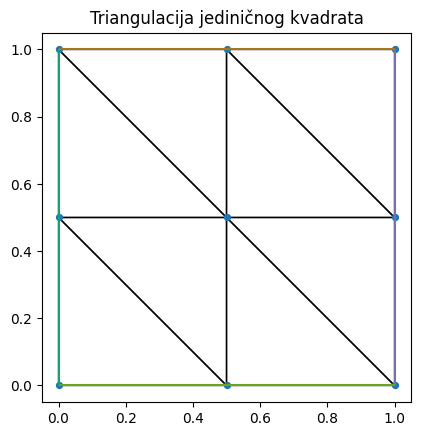

In [6]:

# Prikazivanje ćelija
triplot(mesh)

# Prikaži čvorove kao tačke
# xy = mesh.coordinates.dat.data_ro
plt.scatter(xy[:,0], xy[:,1], s=18)   # čvorovi

plt.gca().set_aspect("equal")
plt.title("Triangulacija jediničnog kvadrata")
plt.show()

## Definisanje desne strane rešenja

Sledeći korak je da definišemo ulazne podatke. Prvo konstruišimo simboličke promenljive x i y pridružene mreži. Ove simboličke promenljive u Firedrake-u  su tzv. UFL objekti (Unified Form Language) koji su nastali u okviru u FEniCS projekta, a specijalizovani su za varijacione probleme i FEM. Konstruišemo ih pomoću funkcije

**x, y =SpatialCoordinate(mesh)**.

Osim standardni algebarskih i matematičkih operacija, za rad sa UFL objektima u Firedrake-u imamo na raspolaganju
- skalarne i vektorske operatore
   - **dot(a, b)** - skalarni proizvod vektora
   - **cross(a, b)** - vektorski proizvod (3D)
   - **inner(A, B)** - Frobeniusov skalarni proizvod (npr. matrica sa matricom, gradijent sa gradijentom)
   - **outer(a, b)** - spoljašnji (tensor) proizvod

- diferencijalne operatore
   -** grad(u)** - gradijent skalara ili gradijent vektorskog polja
   - **div(v)** - divergencija vektorskog polja
   - **curl(v)** - rotacija (u 2D vraća skalar, u 3D vektor)
   - **nabla_grad(u)** - ∇u u tensor obliku - nabla_div(v) - ∇(div v)

- integrali i mere
   - **dx** - integral preko domena (ćelija)
   - **ds** - integral preko spoljašnje granice
   - **dS** - integral preko unutrašnjih granica (skokovi kod DG metoda)
   - **ds(i), dS(i)** - integral preko označenih delova granice/unutrašnjih ivica

 Kako smo izabrali primer za koji znamo tačno rešenje, desnu stranu možemo izračunati direktno u kodu.

In [7]:
(x, y) = SpatialCoordinate(mesh)

u_ex = x*(1-x)*y*(1-y)# tačno rešenje

f = -div(grad(u_ex)) # desna strana jednačine

## Definisanje prostora rešenja i prostora test funkcija

U Firedrake-u diskretni prostor $V_h$ definišemo pomoću funkcije **FunctionSpace** koja kao argumente ima mrežu, tip konačnih elemenata (npr. Lagrange) i stepen polinoma koji se koriste za diskretizaciju:

**Vh = FunctionSpace(mesh, "Lagrange", 1)**.

Dobijamo objekat za koji navodime neke od koristinih metoda:
- **dim()** - broj stepeni slobode (DOF-ova) u prostoru
- **ufl_element()** - opisuje koji je to element (npr. CG, stepen, dimenzija)
- **mesh()** - vraća mrežu na kojoj je prostor definisan
- **tabulate_dof_coordinates()** - koordinate svih DOF-ova (kao NumPy niz).

Aproksimaciju uh i test funkcije vh definišemo kao simboličke objekte, tzv.  UFL objekte. UFL objekte koristimo da zapišemo varijacionu formulaciju problema. Da bismo ih kreirali, koristimo naredbe  **TrialFunction** i **TestFunction** koje kao argumente imaju odgovarajući  funkcionalni prostor

**uh=TrialFunction(Vh)**
**vh=TestFunction(Vh)**

Dakle, uh i vh će biti simboličke promenljive.
Međutim, aproksimacija, tj. rešenje problema, mora biti objekat koji će sadržati numeričke vrednosti. Stoga kreiramo novi objekat u_sol, pomoću komande (konstruktora) **Function** koja kao argument ima prostor u kome tražimo rešenje

**u_sol=Function(Vh)**.

To je zapravo konkretna funkcija u prostoru $V_h$, tj. vektor koeficijenata u bazi prostora
$V_h$. Ona će sadržati numeričke vrednosti rešenja u svim stepenima slobode kada rešimo problem.



Ukoliko se u izrazima pojavljuje neka konstanta c, moramo je definisati kao simbolički objekat sledećom komandom

**Constant(c)**

Za gore navedeni primer, komande bi glasile:

In [8]:
Vh = FunctionSpace(mesh, "Lagrange", 1)

uh = TrialFunction(Vh)
vh = TestFunction(Vh)

u_sol = Function(Vh, name="Solution") # rešenje ćemo upisati u ovu promenljivu, argument name="Solution" definise ime koje će se pojavljivati se u VTK/ParaView fajlovima




## Definisanje graničnih uslova i bilinearne forme

Dirihleovi granični uslovi se nazivaju esencijalnim ili jakim graničnim uslovima. Oni se moraju nametnuti kroz definiciju samog prostora rešenja. U Firedrake-u komanda za definisanje graničnih uslova glasi:

**bc = DirichletBC(V, g, sub_domain)**

gde je:
- **V** - funkcioni prostor na kome se uslov postavlja,
- **g** - vrednost na granici (može biti Constant, Function ...),
- **sub_domain **- deo granice na kome važi uslov.

Argument **sub_domain** može imati sledeće vrednosti:
- **"on_boundary"** - cela spoljna granica,
- integer oznaka (npr. 1, 2) - ako je granica označena pri pravljenju mreže; npr. za kvadrat je standardno
  - 1 = leva ivica ($x=0$),
  - 2 = desna ($x=1$),
  - 3 = donja ($y=0$),
  - 4 = gornja ($y=1$),
- korisnička lambda funkcija koja vraća True/False.

Sa druge strane, Nojmanovi i Robinovi granični uslovi su tzv. prirodni uslovi, koji učestvuju u definiciji same varijacione formulacije, pa njih nema potrebe praviti komande.

Bilinearnu formu $a(u_h, v_h)$ i linearan funkcional zapisujemo direktno koristeći prethodno uvedene UFL objekte i operatore nad njima.

In [9]:
bc = DirichletBC(Vh, u_ex, "on_boundary") # ili bc = DirichletBC(Vh, Constant(0.0), "on_boundary")

a = inner(grad(uh), grad(vh))*dx          # bilinearna forma
l = f*vh*dx                               # linearna funkcional

##Rešavanje problema

Možemo reći da je glavna naredba u Firedrake-u **solve**. Onarešava varijacioni problem (linearan ili nelinearan) i upisuje rešenje u dati objekat tipa Function.

Matematički:

Kod linearnog problema rešava

$$ a(u,v)=l(v),\quad \forall v∈V,$$

dok kod nelinearnog problema rešava
$$
F(u,v)=0,\quad \forall v∈V,
$$
gde je $F$ rezidual, tj. forma koja mora biti jednaka 0.

Argumenti naredbe solve su:
- Prvi argument
  -  za linearni problem: $a == l$
  - nelinearni problem: $F == 0$

- Drugi argument promenljiva tipa Function(V) koji služi kao kontejner za rešenje.

- Treći argument je **bcs** (opciono) - lista ili pojedinačni DirichletBC objekat.

- Četvrti argument je **solver_parameters** (opciono) - rečnik sa podešavanjima PETSc rešavača (npr. metoda, tolerancije).


Dakle, pokretanjem komande

In [10]:
solve(a == l, u_sol, bcs=bc)

upisali smo rešenje u promenljivu u_sol.

Ranije je rečeno da je to objekat klase Function. Navedimo sada neke njene metode i atribute.
- **Function(V, name="Solution")** -  konstruktor
- neke od važnijih metoda
  - **interpolate(expr)**
  - **assign(value/Function)**
  -**at(point)** - određuje vrednost u zadatoj tački point
- atributi
  - **u_sol.dat.data_ro**- Numpy niz sa vrednostima DOF-ova (degrees of freedom - kod deo po deo linearnih Lagranžovih elemenata je to vrednost funkcije u čvoru; vrednosti se ne mogu menjati, tj. niz je read-only).
  - **u_sol.function_space()** - vraća prostor $V_h$ iz kog je funkcija
  - **u_sol.ufl_shape** - vraća oblik funkcije u smislu UFL-a (da li je skalarna, vektorska ili tenzorska; npr. () = skalar, (2,) = 2D vektor, (2,2) = matrica 2×2.).






In [11]:
print(u_sol.dat.data_ro)



[0.         0.         0.         0.05208333 0.         0.
 0.         0.         0.        ]


## Vizuelizacija rešenja

Za brzo i jednostavno grafičko prikazivanje rešenja, Firedrake ima komandu **tripcolor** kojoj kao argument prosleđujemo rešenje:

<Figure size 640x480 with 0 Axes>

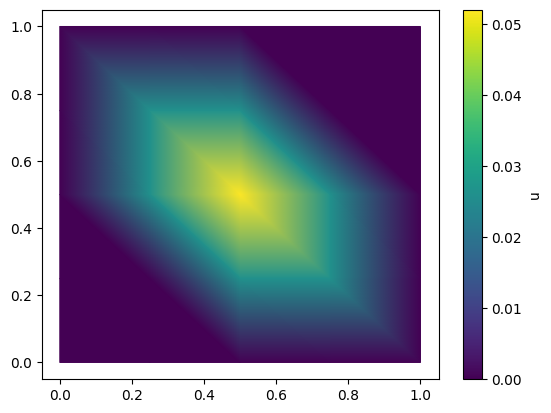

In [12]:
plt.figure()
m = tripcolor(u_sol)
plt.colorbar(m, label="u")
plt.show()

 Međutim, za veće mreže, 3D domene, vektorska i tenzorska polja bolje je izvesti podatke u **VTK format** i otvoriti u **ParaView**.

In [13]:
VTKFile("output/poisson.pvd").write(u_sol)

## Izračunavanje greške

Na kraju pozabavimo se izračnuvanjem greške. U Firedrake-u postoji komanda

**norm(expr, norm_type="L2", mesh=None)**

izračunava normu nekog izraza. Argument **norm_type** može biti
- "L2" - $L^2$ standardna norma
- "H1"
- "H1_semi" - $H^1$ polunorma
- "Hdiv" i "Hcurl" u slučaju da radimo sa vektorskim poljima.

Dakle, $H^1$ - normu greške možemo izračnati i prikazati na sledeći način:

In [14]:
print(f"||u_sol - u_ex||_H1: {norm(u_sol - u_ex, 'H1')}")

||u_sol - u_ex||_H1: 0.10808515241979871


## Kompletan kod rešenja

Za kraj, navedimo kompletan kod rešenja bez vizuelizacija u jednoj ćeliji sveske

In [16]:
from firedrake import *

#formiranje mreze
nx=4
ny=4
mesh = UnitSquareMesh(nx, ny)

# simbolicke promenljive na mrezi
(x, y) = SpatialCoordinate(mesh)

# tacno resenje i desna strana problema
u_ex = x*(1-x)*y*(1-y)
f = -div(grad(u_ex))

# prostor resenja i simbolicke probne i test funkcije
Vh = FunctionSpace(mesh, "Lagrange", 1)
uh = TrialFunction(Vh)
vh = TestFunction(Vh)

# inicijalizacija aproksimacije
u_sol = Function(Vh, name="Solution")

#granicni uslov
bc = DirichletBC(Vh, u_ex, "on_boundary")

#bilinearna forma i linearni funkcional
a = inner(grad(uh), grad(vh))*dx
l = f*vh*dx

# resenje
solve(a == l, u_sol, bcs=bc)


VTKFile("output/poisson.pvd").write(u_sol)

print(f"||u_sol - u_ex||_H1: {norm(u_sol - u_ex, 'H1')}")

||u_sol - u_ex||_H1: 0.05902930824938546
